In [36]:
import os
os.chdir('../')
# This should be the project root folder
os.getcwd()

'/home/pex/Documents/unitn/TODO/Applied_ML'

In [37]:
import tensorflow as tf

from adda.models import Phase1Model
from adda.data_loaders import USPS

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from adda.settings import config as cfg

In [38]:
# Load the dataset into the data object
data = USPS(sample=False)

TypeError: __init__() got an unexpected keyword argument 'sample'

[4]
[1]
[16]
[14]
[11]
[10]
[7]
[0]
[17]
[26]


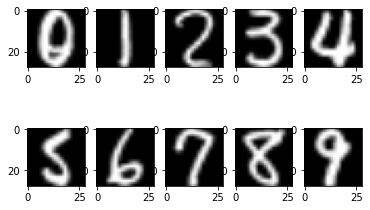

In [23]:
# Plot an ordered sample of handwritten digits (and their index)
X = data.training_data
Y = data.training_labels

fig, ax = plt.subplots(2, 5)
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(y == i)[0]
    print(im_idx)
    plottable_image = np.reshape(X[im_idx], (28, 28))
    # ax[i].imshow(plottable_image, cmap='gray_r')
    ax[i].imshow(plottable_image)

In [24]:
# Load the trained and saved model
model = tf.keras.models.load_model(cfg.PHASE1_MODEL_PATH, compile=False)
model.summary()

Model: "phase1_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
le_net_encoder (LeNetEncoder multiple                  25570     
_________________________________________________________________
le_net_classifier (LeNetClas multiple                  405510    
Total params: 431,080
Trainable params: 431,080
Non-trainable params: 0
_________________________________________________________________


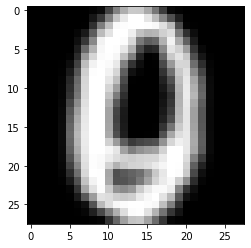

In [25]:
# Select an image to be classified by the model
img = X[4]
plottable_image = np.reshape(img, (28, 28))
plt.gray()
plt.imshow(plottable_image)
plt.show()

In [26]:
# Verify the label associated to the training datapoint
label = Y[4]
Y[4]

0

In [27]:
# Expand dimensions to [1, 28, 28, 1]
img = np.reshape(img, (1, 28, 28, 1))
np.shape(img)

(1, 28, 28, 1)

In [28]:
# Replicate the image expanding the dimensions to [2, 28, 28, 1]
# Why? Because TensorFlow doesn't like a single input; so a replication is needed.
img = np.tile(img, [2, 1, 1, 1])
np.shape(img)

(2, 28, 28, 1)

In [29]:
# Let's make a class prediction for the selected image
logits, preds = model(img, training=False)

# Extract the maximun value of the class probabilities
prediction = tf.argmax(preds, -1)
print('Class: {}'.format(prediction[0]))
print('Predictions: {}'.format(preds[0]))

# We generated a feature map of a USPS data point using the CNN encoder trained with the MNIST dataset.
# Obviously it is wrongly classified.

Class: 5
Predictions: [0.07521862 0.07747231 0.12286932 0.13876632 0.06280921 0.15519486
 0.07384787 0.10412801 0.10079039 0.08890309]
